## News Mood 

In [7]:
# Dependencies
import tweepy
import json
from config import consumer_key, consumer_secret, access_token, access_token_secret
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime,date

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [8]:
# Target Account
#news_sources = ["@BBC","@CBS", "@CNN", "@FoxNews","@nytimes"]
news_sources = ["@nytimes","@FoxNews", "@CNN", "@BBC","@CBS"]          

In [9]:

# Variables for holding sentiments
sentiments = []
    
# Variable for max_id
oldest_tweet = None

# Counter
counter = 1

#Todays date
today = str(date.today())

#Average Polarity Scores
polarityAvgCalculator = []
polorityAvg = []

for id in news_sources:
    
# Counter
    counter = 1
    
# Loop through 5 pages of tweets (total 100 tweets)
    for x in range(1,6): 

    # Get all tweets from home feed
        public_tweets = api.user_timeline(id, max_id = oldest_tweet)
       
    # Loop through all tweets 
        for tweet in public_tweets:
      
    # Run Vader Analysis on each tweet
            tweet_datetime = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")
            results = analyzer.polarity_scores(tweet["text"])
            #Add the necessarty values from the API response into a dictionary
            sentiments.append({"Date": tweet["created_at"], 
                              "News Channel": id,
                              "News Time" : tweet_datetime,
                              "News text": tweet["text"],
                              "Tweet ID" : tweet["id"],
                              "Sentiment" : results["compound"],
                              "pos" : results["pos"],
                              "neg" : results["neg"],
                              "neutral" : results["neu"],
                              "Tweet Ago": counter})
        
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1
        #incrementing the counter
            counter += 1 
            polarityAvgCalculator.append(results["compound"])
    polorityAvg.append(np.mean(polarityAvgCalculator))
    polarityAvgCalculator = []
      

In [10]:
#Add the dictionary to the dataframe
news_twitter_df = pd.DataFrame(sentiments)

#Saving the dataframe into CSV
news_twitter_df.to_csv("sentiments.csv", encoding='utf-8', index=False)

Scatter Plots

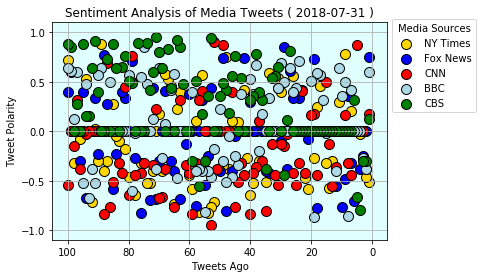

In [11]:
fig, ax = plt.subplots()

#NY Times
ax.scatter(news_twitter_df[news_twitter_df["News Channel"] == "@nytimes"]['Tweet Ago'], 
           news_twitter_df[news_twitter_df["News Channel"] == "@nytimes"]['Sentiment'],  
           c='gold', 
           alpha=1, 
           s= 100,
           linewidths =1,
           edgecolor='black', 
           label='NY Times')

#Fox News
ax.scatter(news_twitter_df[news_twitter_df["News Channel"] == "@FoxNews"]['Tweet Ago'], 
           news_twitter_df[news_twitter_df["News Channel"] == "@FoxNews"]['Sentiment'],  
           c='blue', 
           alpha=1, 
           s= 100,
           linewidths =1,
           edgecolor='black', 
           label='Fox News')

#CNN
ax.scatter(news_twitter_df[news_twitter_df["News Channel"] == "@CNN"]['Tweet Ago'], 
           news_twitter_df[news_twitter_df["News Channel"] == "@CNN"]['Sentiment'],  
           c='red', 
           alpha=1, 
           s= 100,
           linewidths =1,
           edgecolor='black', 
           label='CNN')

#BBC
ax.scatter(news_twitter_df[news_twitter_df["News Channel"] == "@BBC"]['Tweet Ago'], 
           news_twitter_df[news_twitter_df["News Channel"] == "@BBC"]['Sentiment'],  
           c='lightblue', 
           alpha=1, 
           s= 100,
           linewidths =1,
           edgecolor='black', 
           label='BBC')

#CBS
ax.scatter(news_twitter_df[news_twitter_df["News Channel"] == "@CBS"]['Tweet Ago'], 
           news_twitter_df[news_twitter_df["News Channel"] == "@CBS"]['Sentiment'],  
           c='green', 
           alpha=1, 
           s= 100,
           linewidths =1,
           edgecolor='black', 
           label='CBS')
#Setting the Title of the scatter plot
plt.title("Sentiment Analysis of Media Tweets ( " + str(today) + " )")

#Setting the X and Y axis of scatter plot
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#Legend
#Moving the legends outside the plot
ax.legend(title="Media Sources",loc='center left', bbox_to_anchor=(1, 0.80))

#Changing the X Axis Sort
plt.xlim([105,-5])

#Y Axis Interval
plt.yticks(np.arange(-1,1.5,0.5))

#Gridding the scatter plot
plt.grid()

#Setting Background Color of the Plot
ax.patch.set_facecolor("lightcyan")


# Save Figure
plt.savefig("Sentiment-Analysis-on-Media-tweets.png",dpi=1000,bbox_inches="tight")

#Show the plot
plt.show()


Bar Chart

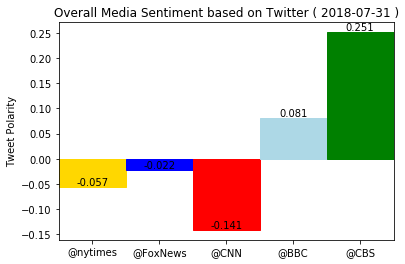

In [12]:
ax = plt.subplot(111)

#Bar plotting the twitter ID and Polarity Score
barPlot = plt.bar(news_sources,polorityAvg,width=1.0,align='center')

#Coloring the bar plot
barPlot[0].set_color('gold')
barPlot[1].set_color('blue')
barPlot[2].set_color('red')
barPlot[3].set_color('lightblue')
barPlot[4].set_color('green')

#Setting the X scale
plt.xlim([-0.5,4.5])

#Annotating the Bar plot
rects = ax.patches

counterAxis = 0
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height,"{0:.3f}".format(polorityAvg[counterAxis]), ha='center', va='bottom')
    counterAxis = counterAxis + 1

#Y Axis & Title
ax.set_ylabel('Tweet Polarity')
ax.set_title("Overall Media Sentiment based on Twitter ( " + str(today) + " )")

# Save Figure
plt.savefig("Overall-Sentiment-based-on-Twitter.png", dpi=1000)

#Show the plot
plt.show()


1. CBS has the higher compound score through the sentiment analyis tool.  It has a high number of neutral tweets,combined with a smaller number of negative tweets which calculated their overall score higher than the other media outlets.
2. Fox News, had few positive compound scores and a significantly higher amount of negative numbers compared to the other media sources.  This led to having the greater negative number then the other sources which we are comparing.
3. NY Times has the fewest neutral results on the scatter plot graph, but their overall score is almost at 0.  This would indicate a balanced number of positive and negative values to arrive at this amount.